In [219]:
# 1. 국토교통부 실거래가 공개시스템 (http://rtdown.molit.go.kr/)에서 '아파트'와 '매매' 조건을 선택하여 2023년 대구 지역의 데이터를 CSV 파일로 다운로드하세요.
# pandas를 활용하여 이 파일을 읽고 처리한 후, 데이터를 시각화하세요.

# 1) 구별 거래 건수와 거래 금액 합계를 막대 그래프로 출력
# 2) 대구 전체의 구별 거래 건수와 거래 금액을 파이 그래프로 출력
# 3) 월별 거래 건수를 변화를 선 그래프로 출력
# 4) 수성구 동별로 거래건수와 거래 금액의 합계를 막대 그래프로 출력
# 5) 수성구 전체의 거래 건수와 평균 거래금액의 월별 변화를 선 그래프로 출력
# 6) 수성수 전체의 전용면적별 거래량을 히스토그램으로 출력 하여 대구시의 부동산 거래 현황을 분석하세요.

In [270]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [221]:
df1 = pd.read_csv('./input/아파트(매매)_실거래가_20240318092509.csv', encoding='cp949')
df1.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,84.9300,202303,13,"20,000",101,3,-,-,1989,화원로 10,-,직거래,-,2023.3.14
1,2,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,73.7775,202303,19,"20,400",102,4,-,-,1989,화원로 10,-,중개거래,대구 달성군,2023.3.30
2,3,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,73.7775,202303,27,"21,000",105,5,-,-,1989,화원로 10,-,중개거래,대구 달서구,2023.5.19
3,4,대구광역시 달성군 화원읍 천내리,118,118,0,화원창신맨션,80.7600,202306,12,"25,000",102,3,-,-,1990,화원로 36,-,중개거래,대구 달성군,2023.6.21
4,5,대구광역시 달성군 화원읍 천내리,118,118,0,화원창신맨션,80.7600,202306,12,"22,500",102,5,-,-,1990,화원로 36,-,중개거래,대구 달성군,2023.8.17


In [271]:
matplotlib.rcParams['font.family'] = 'AppleGothic' # 맑은 고딕으로 지정
matplotlib.rcParams['axes.unicode_minus'] = False

In [223]:
df1['구'] = df1['시군구'].str.split(' ').str[1]
df1['거래금액(만원)'] = df1['거래금액(만원)'].str.replace(',', '').astype(int)

In [224]:
df1.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,구
0,1,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,84.9300,202303,13,20000,...,3,-,-,1989,화원로 10,-,직거래,-,2023.3.14,달성군
1,2,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,73.7775,202303,19,20400,...,4,-,-,1989,화원로 10,-,중개거래,대구 달성군,2023.3.30,달성군
2,3,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,73.7775,202303,27,21000,...,5,-,-,1989,화원로 10,-,중개거래,대구 달서구,2023.5.19,달성군
3,4,대구광역시 달성군 화원읍 천내리,118,118,0,화원창신맨션,80.7600,202306,12,25000,...,3,-,-,1990,화원로 36,-,중개거래,대구 달성군,2023.6.21,달성군
4,5,대구광역시 달성군 화원읍 천내리,118,118,0,화원창신맨션,80.7600,202306,12,22500,...,5,-,-,1990,화원로 36,-,중개거래,대구 달성군,2023.8.17,달성군


In [225]:
df1.dtypes

NO            int64
시군구          object
번지           object
본번            int64
부번            int64
단지명          object
전용면적(㎡)     float64
계약년월          int64
계약일           int64
거래금액(만원)      int64
동            object
층             int64
매수자          object
매도자          object
건축년도          int64
도로명          object
해제사유발생일      object
거래유형         object
중개사소재지       object
등기일자         object
구            object
dtype: object

In [226]:
df2 = df1.groupby('구', as_index=False).agg(n=('거래금액(만원)', 'sum'), count=('구', 'count'))
df2

,구,n,count
0,군위군,209700,10
1,남구,19495305,568
2,달서구,169315116,5376
3,달성군,84556450,3484
4,동구,90655145,3118
5,북구,110486505,4043
6,서구,14525972,562
7,수성구,210071691,3650
8,중구,48000265,1118


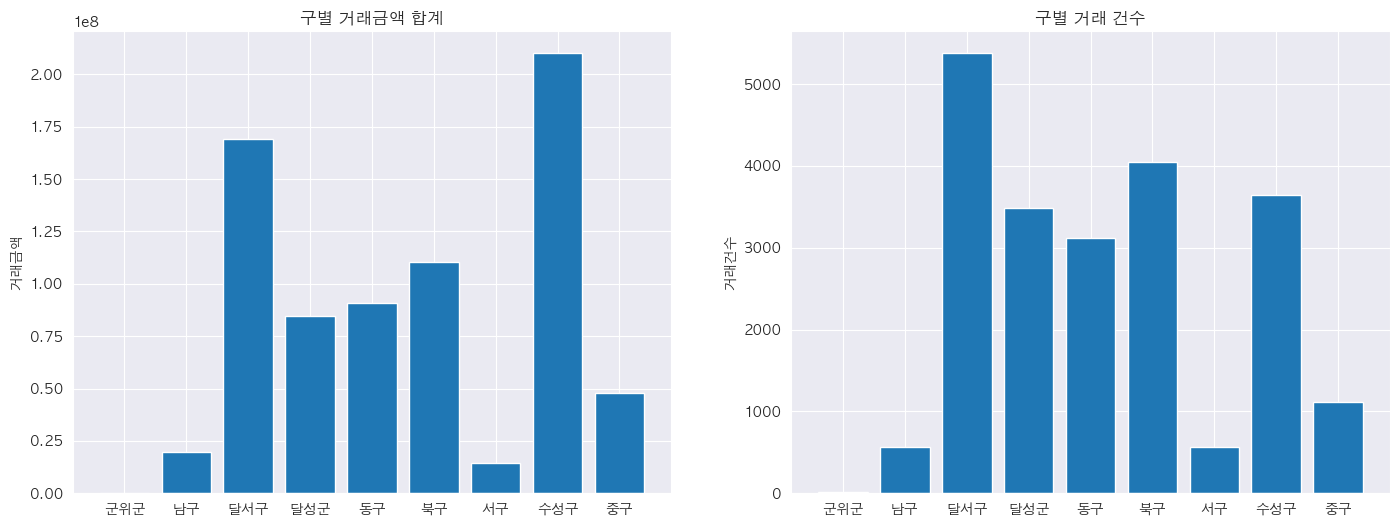

In [227]:
# 1) 구별 거래 건수와 거래 금액 합계를 막대 그래프로 출력
fig = plt.figure(figsize=(17, 6))
index = np.arange(4)
# 2) 첫번쨰 서브 플롯설정
fig.add_subplot(1, 2, 1)
plt.bar(df2['구'], df2['n'])
plt.title('구별 거래금액 합계')
plt.ylabel('거래금액')

# 3) 두번쨰 서브 플롯설정
fig.add_subplot(1, 2, 2)
plt.bar(df2['구'], df2['count'])
plt.title('구별 거래 건수')
plt.ylabel('거래건수')
plt.show()

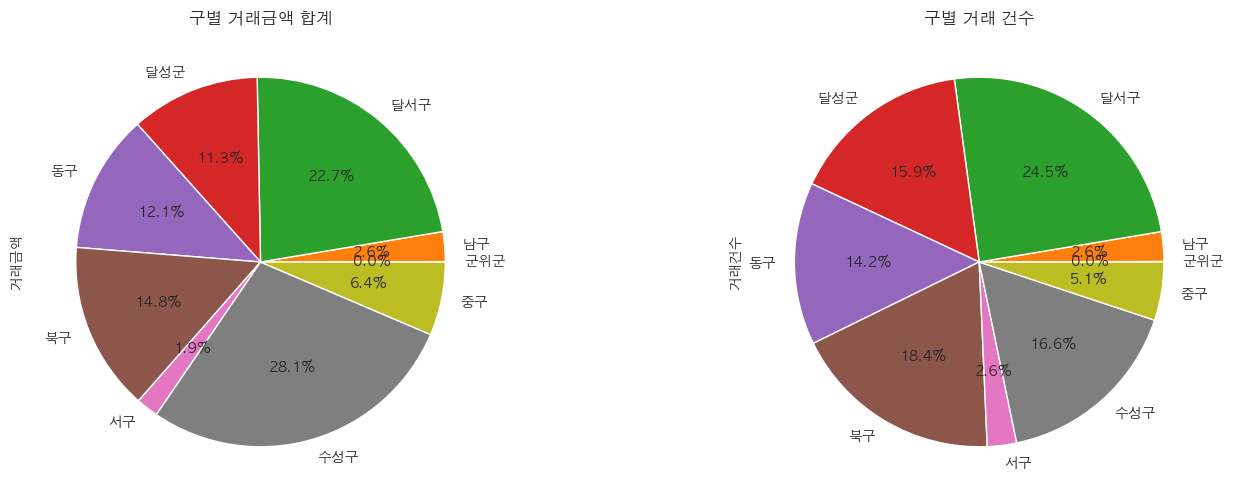

In [228]:
# 2) 대구 전체의 구별 거래 건수와 거래 금액을 파이 그래프로 출력
fig = plt.figure(figsize=(17, 6))
# 2) 첫번쨰 서브 플롯설정
fig.add_subplot(1, 2, 1)
plt.pie(df2['n'], labels=df2['구'], autopct='%1.1f%%')
plt.title('구별 거래금액 합계')
plt.ylabel('거래금액')

# 3) 두번쨰 서브 플롯설정
fig.add_subplot(1, 2, 2)
plt.pie(df2['count'], labels=df2['구'], autopct='%1.1f%%')
plt.title('구별 거래 건수')
plt.ylabel('거래건수')
plt.show()

In [229]:
df1['월'] = df1['계약년월'].astype(str).str[-2:]
df1.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,구,월
0,1,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,84.9300,202303,13,20000,...,-,-,1989,화원로 10,-,직거래,-,2023.3.14,달성군,03
1,2,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,73.7775,202303,19,20400,...,-,-,1989,화원로 10,-,중개거래,대구 달성군,2023.3.30,달성군,03
2,3,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,73.7775,202303,27,21000,...,-,-,1989,화원로 10,-,중개거래,대구 달서구,2023.5.19,달성군,03
3,4,대구광역시 달성군 화원읍 천내리,118,118,0,화원창신맨션,80.7600,202306,12,25000,...,-,-,1990,화원로 36,-,중개거래,대구 달성군,2023.6.21,달성군,06
4,5,대구광역시 달성군 화원읍 천내리,118,118,0,화원창신맨션,80.7600,202306,12,22500,...,-,-,1990,화원로 36,-,중개거래,대구 달성군,2023.8.17,달성군,06


In [230]:
df3 = df1.groupby('월').agg(count=('구', 'count'))
df3.head()

,count
월,
01,941
02,1670
03,1949
04,1844
05,2095


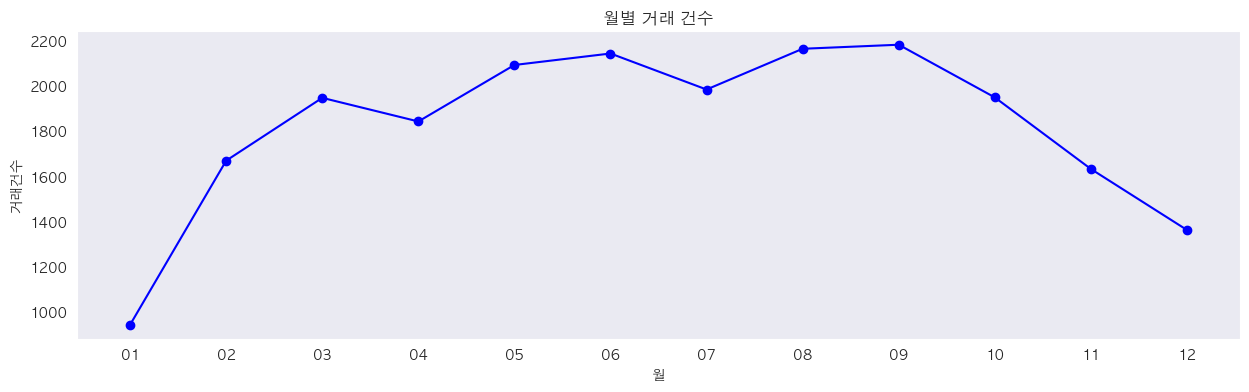

In [231]:
# 3) 월별 거래 건수를 변화를 선 그래프로 출력
plt.figure(figsize=(15, 4))
plt.plot(df3, color='b', marker='o')
plt.title('월별 거래 건수')
plt.xlabel('월')
plt.ylabel('거래건수')
plt.grid()
plt.show()

In [232]:
df1.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,구,월
0,1,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,84.9300,202303,13,20000,...,-,-,1989,화원로 10,-,직거래,-,2023.3.14,달성군,03
1,2,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,73.7775,202303,19,20400,...,-,-,1989,화원로 10,-,중개거래,대구 달성군,2023.3.30,달성군,03
2,3,대구광역시 달성군 화원읍 천내리,42,42,0,(화원)영남,73.7775,202303,27,21000,...,-,-,1989,화원로 10,-,중개거래,대구 달서구,2023.5.19,달성군,03
3,4,대구광역시 달성군 화원읍 천내리,118,118,0,화원창신맨션,80.7600,202306,12,25000,...,-,-,1990,화원로 36,-,중개거래,대구 달성군,2023.6.21,달성군,06
4,5,대구광역시 달성군 화원읍 천내리,118,118,0,화원창신맨션,80.7600,202306,12,22500,...,-,-,1990,화원로 36,-,중개거래,대구 달성군,2023.8.17,달성군,06


In [233]:
# 수성구 동별로 거래건수와 거래 금액의 합계를 막대 그래프로 출력
df4 = df1[df1['구'] == '수성구']
df4.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,구,월
12903,12904,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202306,19,80000,...,-,-,2009,동대구로 345,-,중개거래,대구 수성구,2023.11.3,수성구,06
12904,12905,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202310,19,77000,...,-,-,2009,동대구로 345,-,중개거래,대구 동구 대구 수성구,2023.11.1,수성구,10
12905,12906,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202310,21,81500,...,-,-,2009,동대구로 345,-,중개거래,대구 수성구,2024.1.5,수성구,10
12906,12907,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202307,4,82000,...,-,-,2009,동대구로 345,-,중개거래,대구 수성구,2023.10.30,수성구,07
12907,12908,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202311,2,81500,...,-,-,2009,동대구로 345,-,중개거래,대구 수성구,-,수성구,11


In [234]:
df4['수성구동'] = df4['시군구'].str.split(' ').str[2]
df4.head()

/var/folders/ch/9dhkv5f92c353r15wr2y5d800000gn/T/ipykernel_12519/1453802494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['수성구동'] = df4['시군구'].str.split(' ').str[2]


,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,구,월,수성구동
12903,12904,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202306,19,80000,...,-,2009,동대구로 345,-,중개거래,대구 수성구,2023.11.3,수성구,06,범어동
12904,12905,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202310,19,77000,...,-,2009,동대구로 345,-,중개거래,대구 동구 대구 수성구,2023.11.1,수성구,10,범어동
12905,12906,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202310,21,81500,...,-,2009,동대구로 345,-,중개거래,대구 수성구,2024.1.5,수성구,10,범어동
12906,12907,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202307,4,82000,...,-,2009,동대구로 345,-,중개거래,대구 수성구,2023.10.30,수성구,07,범어동
12907,12908,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202311,2,81500,...,-,2009,동대구로 345,-,중개거래,대구 수성구,-,수성구,11,범어동


In [241]:
df5 = df4.groupby('수성구동', as_index=False).agg(n=('거래금액(만원)', 'sum'), count=('수성구동', 'count'))
df5.head()

,수성구동,n,count
0,노변동,2662450,58
1,두산동,9672010,106
2,만촌동,21317000,359
3,매호동,3732850,155
4,범물동,8620382,262


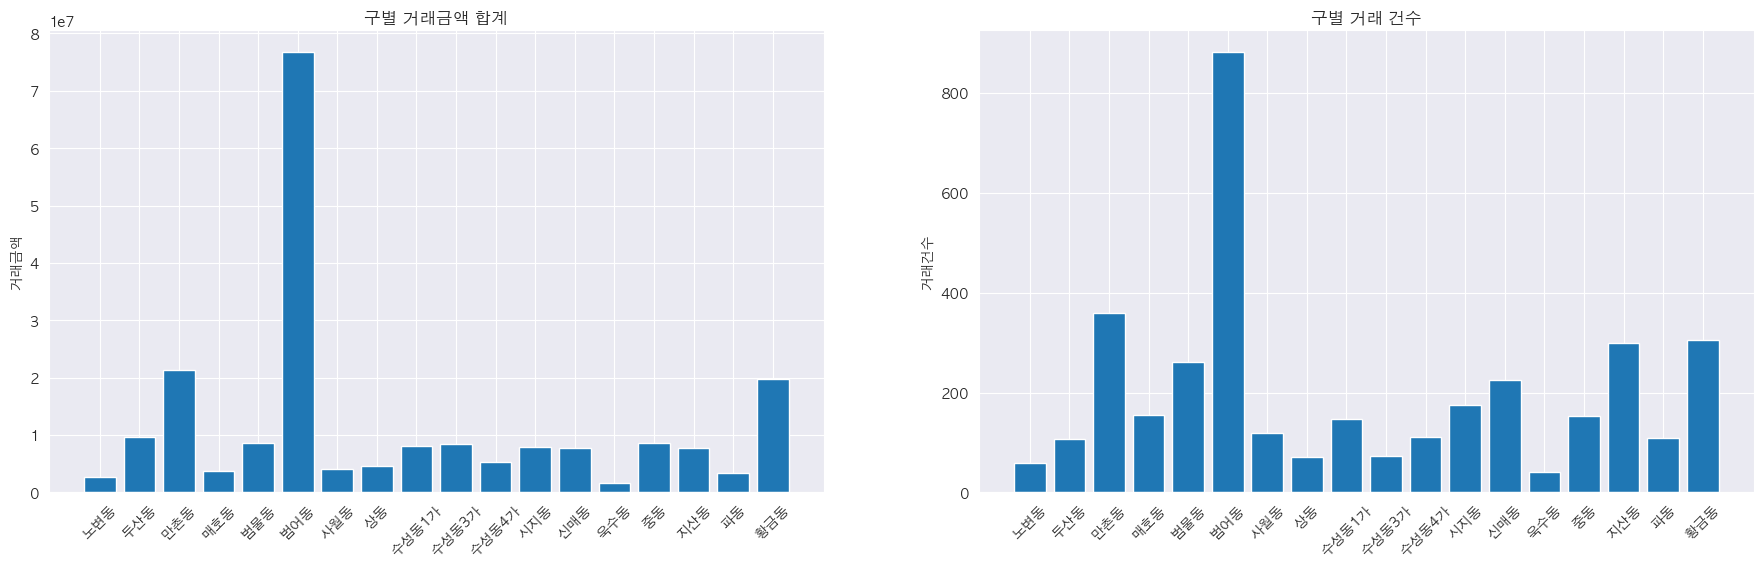

In [242]:
# 1) 구별 거래 건수와 거래 금액 합계를 막대 그래프로 출력
fig = plt.figure(figsize=(22, 6))

# 2) 첫번쨰 서브 플롯설정
fig.add_subplot(1, 2, 1)
plt.bar(df5['수성구동'], df5['n'])
plt.title('구별 거래금액 합계')
plt.ylabel('거래금액')
plt.xticks(rotation=45)
# x축 눈금 이름을 지정

# 3) 두번쨰 서브 플롯설정
fig.add_subplot(1, 2, 2)
plt.bar(df5['수성구동'], df5['count'])
plt.title('구별 거래 건수')
plt.ylabel('거래건수')
plt.xticks(rotation=45)

plt.show()

In [248]:
# 5) 수성구 전체의 거래 건수와 평균 거래금액의 월별 변화를 선 그래프로 출력
df6 = df4.groupby('월', as_index=False).agg(n=('거래금액(만원)', 'mean'))
df6.head()

,월,n
0,01,57542.615385
1,02,58828.430605
2,03,58390.781250
3,04,58235.770393
4,05,60207.696629


In [249]:
df7 = df4.groupby('월', as_index=False).agg(count=('구', 'count'))
df7.head()

,월,count
0,01,130
1,02,281
2,03,320
3,04,331
4,05,356


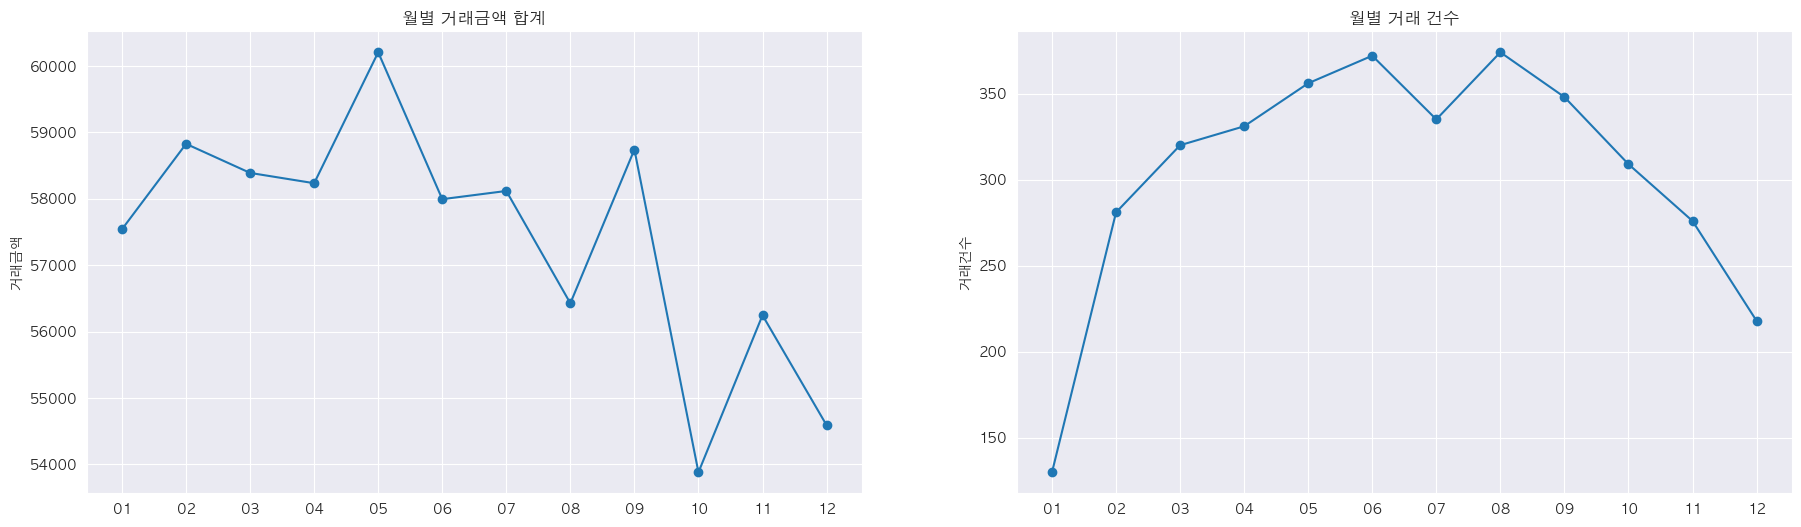

In [277]:
fig = plt.figure(figsize=(22, 6))

# 2) 첫번쨰 서브 플롯설정
fig.add_subplot(1, 2, 1)
plt.plot(df6['월'], df6['n'], marker='o', label='평균 거래금액')
plt.title('월별 거래금액 합계')
plt.ylabel('거래금액')

# 3) 두번쨰 서브 플롯설정
fig.add_subplot(1, 2, 2)
plt.plot(df7['월'], df7['count'], marker='o', label='거래건수')
plt.title('월별 거래 건수')
plt.ylabel('거래건수')

plt.show()

In [267]:
# 6) 수성수 전체의 전용면적별 거래량을 히스토그램으로 출력 하여 대구시의 부동산 거래 현황을 분석하세요.
df4.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,구,월,수성구동
12903,12904,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202306,19,80000,...,-,2009,동대구로 345,-,중개거래,대구 수성구,2023.11.3,수성구,06,범어동
12904,12905,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202310,19,77000,...,-,2009,동대구로 345,-,중개거래,대구 동구 대구 수성구,2023.11.1,수성구,10,범어동
12905,12906,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202310,21,81500,...,-,2009,동대구로 345,-,중개거래,대구 수성구,2024.1.5,수성구,10,범어동
12906,12907,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202307,4,82000,...,-,2009,동대구로 345,-,중개거래,대구 수성구,2023.10.30,수성구,07,범어동
12907,12908,대구광역시 수성구 범어동,Jan.35,35,1,범어역우방유쉘,115.3747,202311,2,81500,...,-,2009,동대구로 345,-,중개거래,대구 수성구,-,수성구,11,범어동


In [262]:
df8 = df4.groupby('전용면적(㎡)', as_index=False).agg(count=('전용면적(㎡)', 'count'))
df8

,전용면적(㎡),count
0,11.8800,1
1,20.4450,1
2,22.6180,1
3,26.8033,1
4,26.8750,1
...,...,...
541,211.5989,4
542,226.4659,1
543,240.6077,1
544,244.7163,1


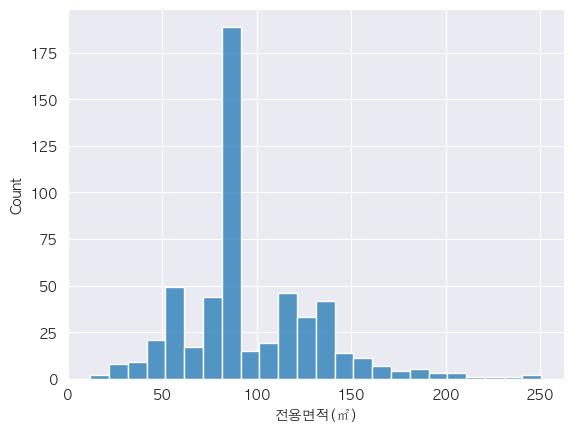

In [266]:
sns.histplot(data=df8, x='전용면적(㎡)')
plt.show()